In [5]:
import numpy as np
import pandas as pd
import os

import strawb
import matplotlib.pyplot as plt
import matplotlib.colors
import scipy.interpolate

# Camera in PMT1 Spec Module

Import dataframe with bioluminescent events.

In [2]:
biolum1_file = 'TUMPMTSPECTROMETER001_20210401T000000_20220901T000000_events.gz'  

if not os.path.exists(biolum1_file):
    print("Doesn't exist")
else:
    biolum1 = pd.read_pickle(biolum1_file)  # dataframe with bioluminescent events

## ----------------------------------------------------------------------------------------------------------

## Location Dependence
Plot the center of mass of all bioluminescent events and compare it to the position of the STRAW-b components.

In [3]:
# position of the module above the camera (LiDAR1)
lidar1_y = (694.507043+693.768910+686.917549+686.774601)/4
lidar1_x = (353.492346+353.288075+357.290158+356.768160)/4

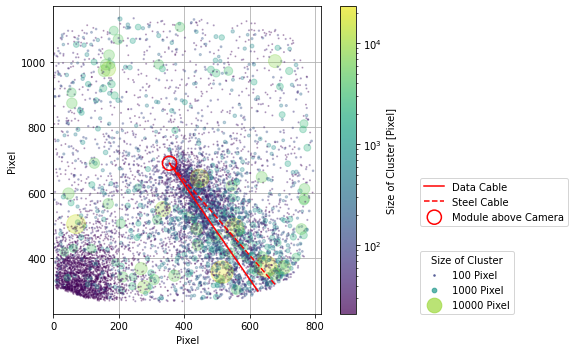

In [18]:
center_of_mass_y = biolum1['center_of_mass_x'].to_numpy()
center_of_mass_x = biolum1['center_of_mass_y'].to_numpy()

### Scatter plot ###
# def. linear norm function for marker size, maps [c.min(), c.max()] -> [s_min, s_max]
# min and max size of markers
s_min=1.
s_max=5e2
norm_size = scipy.interpolate.interp1d([biolum1.n_pixel.min(), biolum1.n_pixel.max()], [s_min, s_max])

# def. cmap, select one
#cmap=strawb.tools.cmap_manipulator('viridis_r', v_min=.03, v_max=1)  # v_min=.03 - cuts the yellow part
cmap=strawb.tools.cmap_manipulator('viridis', v_min=0, v_max=.97)  # v_max=.97 - cuts the yellow part
#cmap=strawb.tools.cmap_manipulator('Blues', v_min=.35, v_max=1)  #  v_min=.3 - cuts the white part


### PLOT
fig, ax = plt.subplots(figsize=(7, 5))
sc = plt.scatter(center_of_mass_x, center_of_mass_y, c=biolum1.n_pixel, s=norm_size(biolum1.n_pixel), 
                 cmap=cmap, norm=matplotlib.colors.LogNorm(),
                 alpha=.3)


plt.scatter(lidar1_x, lidar1_y, s=200, facecolors='none', edgecolors='red', 
            label='Module above Camera', linewidth=1.5) 
ax.plot([625, lidar1_x], [300, lidar1_y], 'r-', linewidth=1.5, label='Data Cable')
ax.plot([678, lidar1_x], [320, lidar1_y], 'r', linewidth=1.5, linestyle='--', label = 'Steel Cable')
ax.legend(loc='lower right', prop={'size':12})

legend1 = ax.legend(loc='lower left', bbox_to_anchor = (1.35, .27))
ax.add_artist(legend1)


# colorbar
cb = plt.colorbar(sc)
cb.set_label("Size of Cluster [Pixel]")
# make alpha different for the colorbar
cb.set_alpha(.7)
cb.draw_all()


### LEGEND START
# get the legend - maybe there is a better solution
num = matplotlib.ticker.LogLocator(numticks=6).tick_values(biolum1.n_pixel.min(), biolum1.n_pixel.max())

fmt = "{x:.0f} Pixel"
legends_c = sc.legend_elements(prop="colors", num=num, fmt=fmt, alpha=.7)


# generate the legend entries with color and size
# generation of legends_c_pos must match! sc.legend_elements(..., fmt,...)
fmt_e = fmt.split('{x')[1].split('}', 1)[1]
fmt_s = fmt.split('{x')[0]

legends_c_pos = np.array([i.replace(fmt_e, '').replace(fmt_s, '') for i in legends_c[1]], dtype=float)
legends_c_size = np.sqrt(norm_size(legends_c_pos))

for i, size_i in enumerate(legends_c_pos):
    legends_c[0][i].set_markersize(legends_c_size[i])


plt.legend(*legends_c, title="Size of Cluster", bbox_to_anchor=(1.35, -.018), loc='lower left')
### LEGEND DONE

plt.xlabel('Pixel')
plt.ylabel('Pixel')

#plt.xlim(0, 960)
#plt.ylim(1280, 0)
plt.xlim(0, 820)
plt.ylim(230, 1170)
ax.set_aspect('equal', 'box')

plt.grid()
plt.gca().set_axisbelow(True)  # move grid behind scatter plot
plt.tight_layout()
#plt.savefig('PMT001_center_of_mass.pdf', bbox_inches='tight')

-------------------------------------------------------------------------------------------------------------

# Camera in PMT2 Spec Module

Import dataframe with bioluminescent events.

In [9]:
biolum2_file = 'TUMPMTSPECTROMETER002_20210701T000000_20220901T000000_events.gz'  

if not os.path.exists(biolum2_file):
    print("Doesn't exist")
else:
    biolum2 = pd.read_pickle(biolum2_file)  # dataframe with bioluminescent events

## ----------------------------------------------------------------------------------------------------------

## Location Dependence
Plot the center of mass of all bioluminescent events and compare it to the position of the STRAW-b components.

In [10]:
# position of the module above the camera (LiDAR2)
lidar2_y = 330
lidar2_x = 680

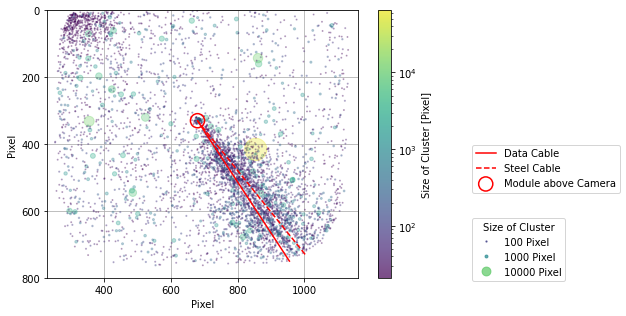

In [24]:
center_of_mass_y = biolum2['center_of_mass_x'].to_numpy()
center_of_mass_x = biolum2['center_of_mass_y'].to_numpy()

### Scatter plot ###
# def. linear norm function for marker size, maps [c.min(), c.max()] -> [s_min, s_max]
# min and max size of markers
s_min=1.
s_max=5e2
norm_size = scipy.interpolate.interp1d([biolum2.n_pixel.min(), biolum2.n_pixel.max()], [s_min, s_max])

# def. cmap, select one
#cmap=strawb.tools.cmap_manipulator('viridis_r', v_min=.03, v_max=1)  # v_min=.03 - cuts the yellow part
cmap=strawb.tools.cmap_manipulator('viridis', v_min=0, v_max=.97)  # v_max=.97 - cuts the yellow part
#cmap=strawb.tools.cmap_manipulator('Blues', v_min=.35, v_max=1)  #  v_min=.3 - cuts the white part


### PLOT
fig, ax = plt.subplots(figsize=(7.5,4.5))
sc = plt.scatter(center_of_mass_y, center_of_mass_x, c=biolum2.n_pixel, s=norm_size(biolum2.n_pixel), 
                 cmap=cmap, norm=matplotlib.colors.LogNorm(),
                 alpha=.3)


plt.scatter(lidar2_x, lidar2_y, s=200, facecolors='none', edgecolors='red', 
            label='Module above Camera', linewidth=1.5) 
ax.plot([955, lidar2_x], [750, lidar2_y], 'r-', linewidth=1.5, label='Data Cable')
ax.plot([1002, lidar2_x], [730, lidar2_y], 'r', linewidth=1.5, linestyle='--', label = 'Steel Cable')

legend1 = ax.legend(loc='lower left', bbox_to_anchor = (1.35, .3))
ax.add_artist(legend1)


# colorbar
cb = plt.colorbar(sc)
cb.set_label("Size of Cluster [Pixel]")
# make alpha different for the colorbar
cb.set_alpha(.7)
cb.draw_all()


### LEGEND START
# get the legend - maybe there is a better solution
num = matplotlib.ticker.LogLocator(numticks=6).tick_values(biolum2.n_pixel.min(), biolum2.n_pixel.max())

fmt = "{x:.0f} Pixel"
legends_c = sc.legend_elements(prop="colors", num=num, fmt=fmt, alpha=.7)

# generate the legend entries with color and size
# generation of legends_c_pos must match! sc.legend_elements(..., fmt,...)
fmt_e = fmt.split('{x')[1].split('}', 1)[1]
fmt_s = fmt.split('{x')[0]

legends_c_pos = np.array([i.replace(fmt_e, '').replace(fmt_s, '') for i in legends_c[1]], dtype=float)
legends_c_size = np.sqrt(norm_size(legends_c_pos))

for i, size_i in enumerate(legends_c_pos):
    legends_c[0][i].set_markersize(legends_c_size[i])

plt.legend(*legends_c, title="Size of Cluster", bbox_to_anchor=(1.35, -.03), loc='lower left')
### LEGEND DONE


plt.xlabel('Pixel')
plt.ylabel('Pixel')

major_ticks_top = np.linspace(0, 800, 5)
ax.set_yticks(major_ticks_top)


plt.xlim(230, 1160)
plt.ylim(800, 0)
ax.set_aspect('equal', 'box')

plt.grid()
plt.gca().set_axisbelow(True)  # move grid behind scatter plot
plt.tight_layout()
#plt.savefig('PMT002_center_of_pix.pdf', bbox_inches='tight')